In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
from tqdm.notebook import tqdm

import os
import pickle as pkl

from attention_cae import Attention_CAE

In [2]:
def compute_operator_auc(y_func, x_func, cms):
    pts = [ (x_func(cm),y_func(cm)) for cm in cms ]
    pts = np.array([(0,0)] + sorted(pts, key=lambda p : p[0]) + [(1,1)])
    auc = np.trapz(y=pts[:,1],x=pts[:,0])
    return auc

def plot_operator_curve(y_func, x_func, cms, 
                        y_name='Y', x_name='X', title='Operator Curve'):
    pts = [ (x_func(cm),y_func(cm)) for cm in cms ]
    pts = np.array([(0,0)] + sorted(pts, key=lambda p : p[0]) + [(1,1)])
    plt.figure()
    plt.title(title)
    plt.plot(pts[:,0],pts[:,1], 'b')
    plt.plot([0,1],[0,1], 'r:')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    
def plot_operator_curves(y_func, x_func, cms_list, legend,
                        y_name='Y', x_name='X', title='Operator Curves'):
    plt.figure()
    plt.title(title)
    plt.plot([0,1],[0,1], 'r:')
    for cms, label in zip(cms_list,legend):
        pts = [ (x_func(cm),y_func(cm)) for cm in cms ]
        pts = np.array([(0,0)] + sorted(pts, key=lambda p : p[0]) + [(1,1)])
        plt.plot(pts[:,0],pts[:,1], label=label)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

def load_cm(file):
    with open(file, 'rb') as f:
        cms = pkl.load(f)
    return cms

In [3]:
CM_FILES = [
    'data/cm_data_ld64_eq10.pkl',
    'data/cm_data_ld64_eq20.pkl',
    'data/cm_data_ld64_eq40.pkl',
    'data/cm_data_ld64_eq60.pkl'
]

CM_LABELS = [ 'N = 10', 'N = 20', 'N = 40', 'N = 60' ]
confusion_matrices = [ load_cm(f) for f in CM_FILES ]


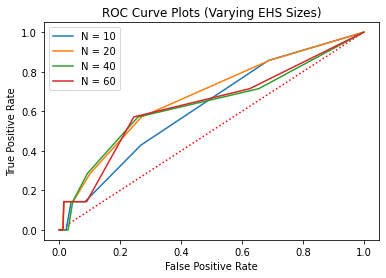

====== Areas Under ROC Curve ======
[N = 10]: 0.6201605642256902
[N = 20]: 0.6768082232893157
[N = 40]: 0.6332533013205282
[N = 60]: 0.6320153061224489


In [4]:

TPR = lambda cm : cm['TP'] / (cm['TP'] + cm['FN'])
FPR = lambda cm : cm['FP'] / (cm['TN'] + cm['FP'])

plot_operator_curves(TPR,FPR,confusion_matrices, CM_LABELS,
                    y_name='True Positive Rate',
                    x_name='False Positive Rate',
                    title='ROC Curve Plots (Varying EHS Sizes)')

print('======', 'Areas Under ROC Curve', '======')
for cms, label in zip(confusion_matrices, CM_LABELS):
    auc = compute_operator_auc(TPR, FPR, cms)
    print(f'[{label}]: {auc}')

In [15]:
# output detailed information:

ALPHAS = np.power(10,np.linspace(-5, 0, 10))
for cms, label in zip(confusion_matrices, CM_LABELS):
    print(label + ' \\\\')
    for cm, alpha in list(zip(cms,ALPHAS))[4:-1]:
        print(f'{alpha:.4f}  &  {TPR(cm):.4f}  &  {FPR(cm):.4f}  \\\\')

N = 10 \\
0.0017  &  0.0000  &  0.0226  \\
0.0060  &  0.1429  &  0.0389  \\
0.0215  &  0.1429  &  0.0846  \\
0.0774  &  0.4286  &  0.2679  \\
0.2783  &  0.8571  &  0.6870  \\
N = 20 \\
0.0017  &  0.1429  &  0.0289  \\
0.0060  &  0.1429  &  0.0452  \\
0.0215  &  0.2857  &  0.1014  \\
0.0774  &  0.5714  &  0.2700  \\
0.2783  &  0.8571  &  0.6896  \\
N = 40 \\
0.0017  &  0.0000  &  0.0289  \\
0.0060  &  0.1429  &  0.0441  \\
0.0215  &  0.2857  &  0.0924  \\
0.0774  &  0.5714  &  0.2584  \\
0.2783  &  0.7143  &  0.6549  \\
N = 60 \\
0.0017  &  0.1429  &  0.0257  \\
0.0060  &  0.1429  &  0.0425  \\
0.0215  &  0.1429  &  0.0898  \\
0.0774  &  0.5714  &  0.2447  \\
0.2783  &  0.7143  &  0.6255  \\
